# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Export the City List into a csv - will use to check Cities output file
cities_list_df = pd.DataFrame(cities)
cities_list_df.to_csv("../output_data/city_list.csv", index_label="City_ID")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE# This URL will use Metric for units
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | constitucion
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | dongsheng
Processing Record 10 of Set 1 | haifa
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | lishui
Processing Record 14 of Set 1 | dovbysh
Processing Record 15 of Set 1 | poplar bluff
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | tawkar
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | alta floresta
Processing Record 22 of Set 1 | castro
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,21.56,64,0,4.34,ZA,1675407526
1,rikitea,-23.1203,-134.9692,26.21,69,6,6.28,PF,1675407526
2,hilo,19.7297,-155.0900,22.28,92,20,1.54,US,1675407337
3,jamestown,42.0970,-79.2353,-7.23,85,100,8.23,US,1675407411
4,bethel,41.3712,-73.4140,1.17,59,0,4.63,US,1675407403


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Convert the Date field into something line "yyyy-mm-dd hh:mm:ss"
# The converted data can be used for something else
#timestamp = city_data_df["Date"][0]
#converted_timestamp = datetime.utcfromtimestamp(timestamp)
#shortened_timestamp = datetime.date(converted_timestamp)


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,64,0,4.34,ZA,1675407526
1,rikitea,-23.1203,-134.9692,26.21,69,6,6.28,PF,1675407526
2,hilo,19.7297,-155.0900,22.28,92,20,1.54,US,1675407337
3,jamestown,42.0970,-79.2353,-7.23,85,100,8.23,US,1675407411
4,bethel,41.3712,-73.4140,1.17,59,0,4.63,US,1675407403


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

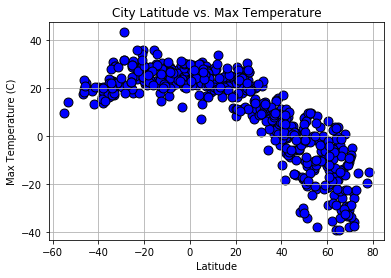

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s = 80, color="blue", edgecolors="black")

# Convert Date for scatter plot title
#title_date = datetime.date(datetime.utcfromtimestamp(city_data_df["Date"]))
#title_date = datetime.datetime.utcfromtimestamp(city_data_df["Date"]).strftime('%Y-%m-%d %H:%M:%S')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

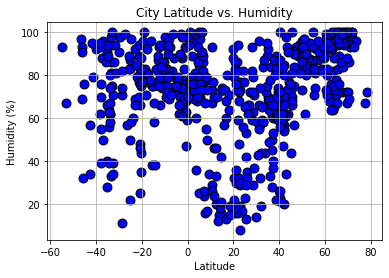

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s = 80, color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

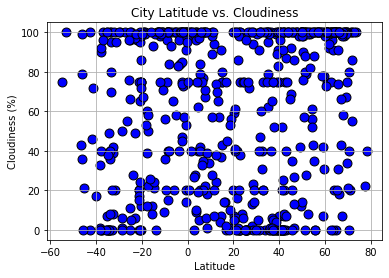

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s = 80, color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

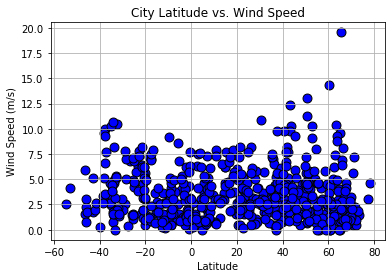

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s = 80, c="blue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(X, y, title, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(X, y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    plt.scatter(X, y)
    plt.plot(X, regress_values, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(X.median(),y.median()),fontsize=15,color="red")
    #plt.annotate(line_eq,(5,1),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.figure(figsize=(20,10))
    plt.show()


In [13]:
#def plot_linear_regression(X, y, title, xlabel, ylabel):
#    X = np.array(X).reshape(-1, 1)
#    model = LinearRegression().fit(X, y)
#    y_pred = model.predict(X)
#    r2 = model.score(X, y)
#
#    plt.scatter(X, y)
#    plt.plot(X, y_pred, color='red')
#    plt.title(title)
#    plt.xlabel(xlabel)
#    plt.ylabel(ylabel)
#    plt.text(0.5, 0.9, f'R^2={r2:.3f}', transform=plt.gca().transAxes)
#    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hilo,19.7297,-155.0900,22.28,92,20,1.54,US,1675407337
3,jamestown,42.0970,-79.2353,-7.23,85,100,8.23,US,1675407411
4,bethel,41.3712,-73.4140,1.17,59,0,4.63,US,1675407403
7,nikolskoye,59.7035,30.7861,-4.01,95,100,2.29,RU,1675407527
8,dongsheng,39.8161,109.9776,-3.16,26,7,5.12,CN,1675407527


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,21.56,64,0,4.34,ZA,1675407526
1,rikitea,-23.1203,-134.9692,26.21,69,6,6.28,PF,1675407526
5,airai,-8.9266,125.4092,16.65,96,100,1.62,TL,1675407527
6,constitucion,-35.3333,-72.4167,16.28,66,0,3.56,CL,1675407356
10,atuona,-9.8000,-139.0333,26.07,77,36,9.23,PF,1675407528


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8682958527667982


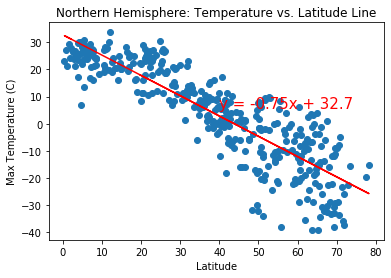

<Figure size 1440x720 with 0 Axes>

None


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Line", "Latitude", "Max Temperature (C)"))

The r-squared is: 0.40463409951258794


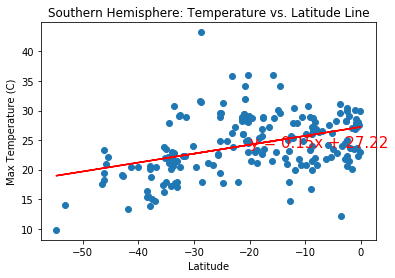

<Figure size 1440x720 with 0 Axes>

None


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Line", "Latitude", "Max Temperature (C)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4532807291504334


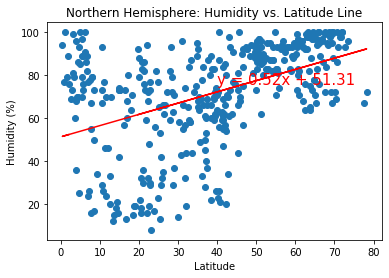

<Figure size 1440x720 with 0 Axes>

None


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Line", "Latitude", "Humidity (%)"))

The r-squared is: 0.15231492248128317


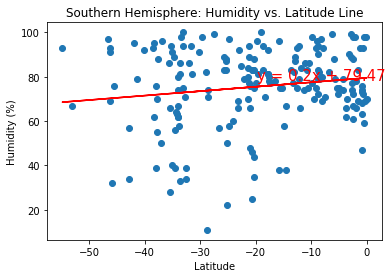

<Figure size 1440x720 with 0 Axes>

None


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Line", "Latitude", "Humidity (%)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.25762685569801724


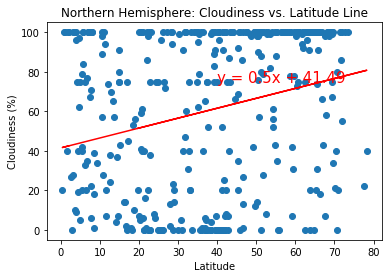

<Figure size 1440x720 with 0 Axes>

None


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Line", "Latitude", "Cloudiness (%)"))

The r-squared is: 0.3530965231408358


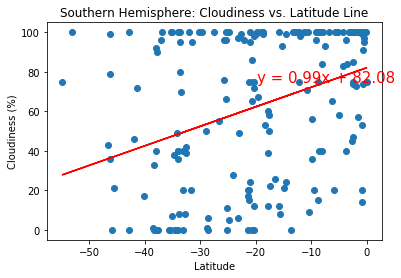

<Figure size 1440x720 with 0 Axes>

None


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Line", "Latitude", "Cloudiness (%)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015315134235424736


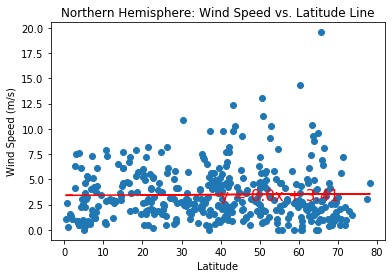

<Figure size 1440x720 with 0 Axes>

None


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Line", "Latitude", "Wind Speed (m/s)"))

The r-squared is: -0.21550839994310397


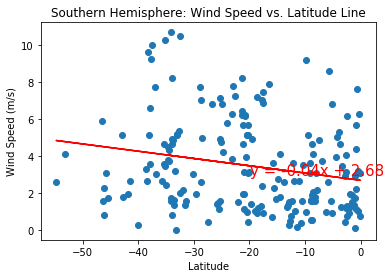

<Figure size 1440x720 with 0 Axes>

None


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Line", "Latitude", "Wind Speed (m/s)"))

**Discussion about the linear relationship:** YOUR RESPONSE HERE